In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [3]:
# Load dataset
file_path = "Books_Dataset.xlsx"   
df = pd.read_excel(file_path)

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Preview dataset
df.head()


,user_id,book_id,title,author,genre,tags,summary,rating,no._of_people_rated,publisher,publication_year
0,62,B1,Stay,Thomas Gates,Thriller,"War, Comedy, Science, Drama",Time green notice indeed beyond bar leg.,3.3,1366,"Patterson, Robertson and Walker",2023
1,8,B2,Oil paper ready take agency minute,Ernest Myers,Thriller,"Crime, Friendship, War",Develop model data at. Bring less less detail ...,3.5,2466,Jones-Arellano,1995
2,45,B3,Offer again garden,Robert Singh,Adventure,"War, Drama, Love, Crime, Comedy",Test future campaign economy. Someone property...,1.2,3026,"Underwood, Mercer and Bennett",1990
3,29,B4,Article it popular,Samantha Lang,Sci-Fi,"Crime, Philosophy, Friendship, Horror, Drama",Yeah food food should bill.,2.7,1462,"Webster, Cruz and Smith",1990
4,34,B5,Drop like,Sean Shaw,Biography,"Crime, War, Adventure, Philosophy",There clear magazine among. Get either dinner ...,4.0,1273,"Wright, Johnson and Thomas",2011


In [4]:
print("Dataset Shape:", df.shape)
print("\n--- Info ---")
print(df.info())
print("\n--- Missing Values ---")
print(df.isnull().sum())


Dataset Shape: (7000, 11)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              7000 non-null   int64  
 1   book_id              7000 non-null   object 
 2   title                6999 non-null   object 
 3   author               7000 non-null   object 
 4   genre                7000 non-null   object 
 5   tags                 7000 non-null   object 
 6   summary              7000 non-null   object 
 7   rating               7000 non-null   float64
 8   no._of_people_rated  7000 non-null   int64  
 9   publisher            7000 non-null   object 
 10  publication_year     7000 non-null   int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 601.7+ KB
None

--- Missing Values ---
user_id                0
book_id                0
title                  1
author                 0
genre     

In [5]:
print("\n--- Descriptive Statistics ---")
print(df.describe())



--- Descriptive Statistics ---
           user_id       rating  no._of_people_rated  publication_year
count  7000.000000  7000.000000          7000.000000       7000.000000
mean     40.295857     3.018314          2471.500714       2002.595286
std      23.138057     1.141137          1450.540381         13.131167
min       1.000000     1.000000             0.000000       1980.000000
25%      20.000000     2.000000          1228.750000       1992.000000
50%      40.000000     3.000000          2458.000000       2003.000000
75%      60.000000     4.000000          3734.500000       2014.000000
max      80.000000     5.000000          5000.000000       2025.000000


### 📊 Descriptive Statistics Summary

- **Dataset Size**: 7,000 entries with 4 numeric columns (`user_id`, `rating`, `no._of_people_rated`, `publication_year`).

#### 🔹 Ratings
- **Range**: 1 (min) to 5 (max)  
- **Mean Rating**: ~3.02  
- **Distribution**: 25% gave ratings ≤ 2, while 75% gave ratings ≤ 4  
  → Suggests ratings are fairly balanced, with a slight tendency towards mid to high scores.  

#### 🔹 Number of People Rated
- **Range**: 0 to 5000  
- **Average**: ~2471 people per book  
- **Spread**: Large variation (std ~1450), meaning some books are extremely popular, while others have low visibility.  

#### 🔹 Publication Year
- **Range**: 1980 to 2025  
- **Median Year**: 2003  
- **Trend**: Majority of books are published post-1990, with a growing trend in the 2000s.  
- **Note**: Years beyond the current year (2025) might indicate data entry issues or future editions.  

#### 🔹 User IDs
- **Range**: 1 to 80  
- **Mean ID**: ~40  
- This column looks more like an identifier and doesn’t provide meaningful statistical insights.

---
✅ Overall, the dataset shows a balanced rating system, high variability in popularity (ratings count), and a clear timeline concentration from the 1990s onward.


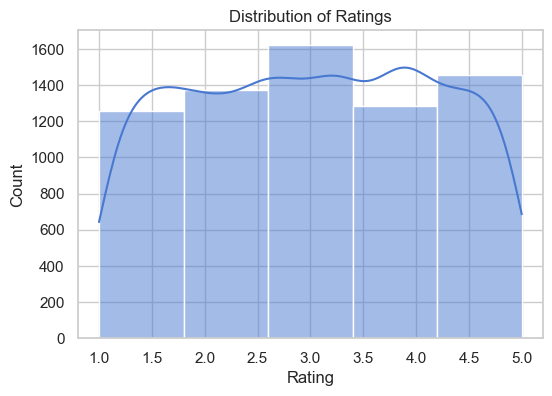

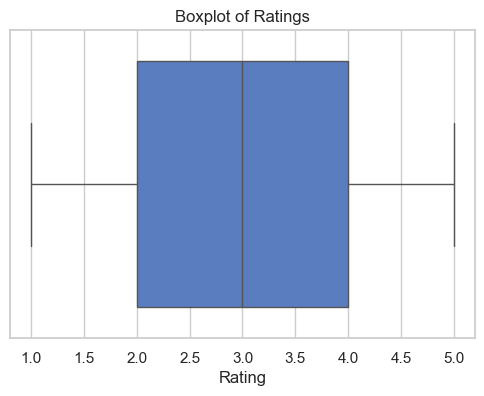

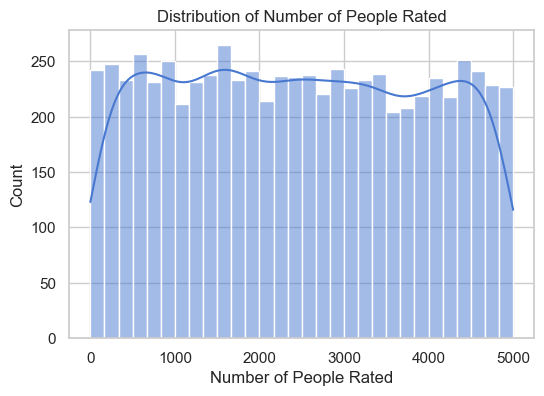

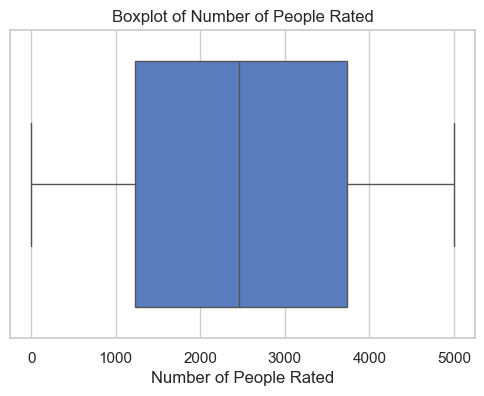

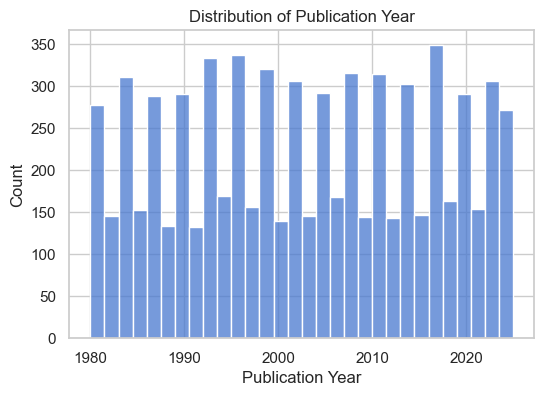

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid", palette="muted")

# --- Distribution of Ratings ---
plt.figure(figsize=(6,4))
sns.histplot(df['rating'], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# --- Boxplot of Ratings ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['rating'])
plt.title("Boxplot of Ratings")
plt.xlabel("Rating")
plt.show()

# --- Distribution of Number of People Rated ---
plt.figure(figsize=(6,4))
sns.histplot(df['no._of_people_rated'], bins=30, kde=True)
plt.title("Distribution of Number of People Rated")
plt.xlabel("Number of People Rated")
plt.ylabel("Count")
plt.show()

# --- Boxplot of Number of People Rated ---
plt.figure(figsize=(6,4))
sns.boxplot(x=df['no._of_people_rated'])
plt.title("Boxplot of Number of People Rated")
plt.xlabel("Number of People Rated")
plt.show()

# --- Distribution of Publication Year ---
plt.figure(figsize=(6,4))
sns.histplot(df['publication_year'], bins=30, kde=False)
plt.title("Distribution of Publication Year")
plt.xlabel("Publication Year")
plt.ylabel("Count")
plt.show()


# 📊 Exploratory Data Analysis (EDA) Summary

### 1. Ratings
- **Distribution:** Ratings are fairly evenly spread across 1–5, with a slight peak around **3**.  
- **Boxplot Insights:** Most ratings fall between **2 and 4**, with the median at **3**. No significant outliers observed.  

---

### 2. Number of People Rated
- **Distribution:** Ranges from **0 to ~5000**, relatively uniform without strong skew.  
- **Boxplot Insights:** Median around **2500**, suggesting books typically receive a moderate number of ratings. Spread is balanced with no extreme outliers.  

---

### 3. Publication Year
- **Distribution:** Books published from **1980s to 2020s**.  
- **Trend:** Consistent publishing activity across decades, with noticeable peaks in **1990s–2000s** and **2010s**.  

---

## ✅ Key Insights
- Ratings are **balanced**, with **3-star ratings most common**.  
- The number of people rating books is **diverse**, but fairly even across the dataset.  
- Publication years show **broad temporal coverage**, indicating a wide variety of books from different eras.  

Overall, the dataset is **well-balanced** without heavy skew or outliers, making it suitable for building a **book recommendation system**.


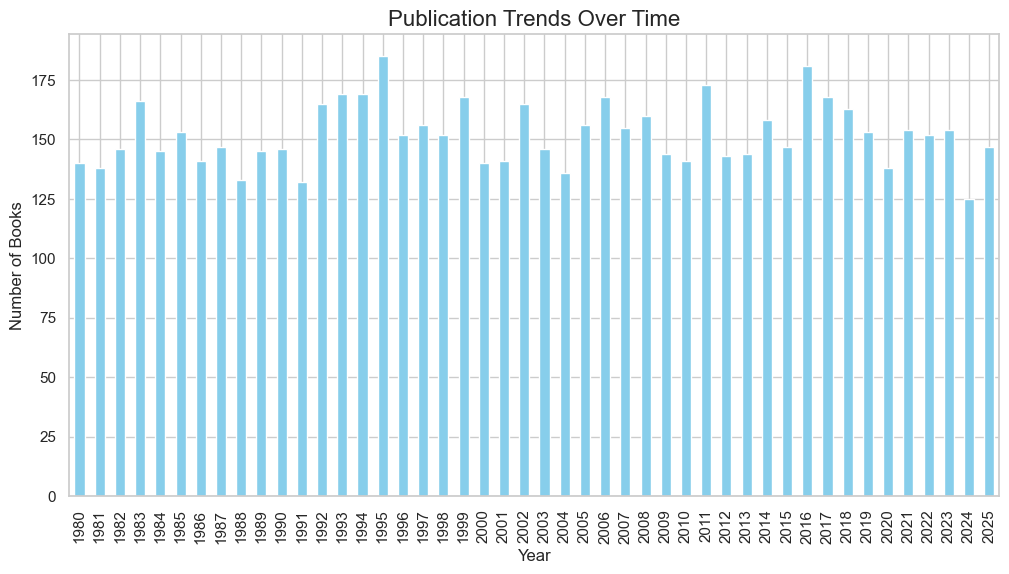

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# -------------------------------
# 1. Publication Trends Over Time
# -------------------------------
plt.figure(figsize=(12,6))
df['publication_year'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Publication Trends Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Books", fontsize=12)
plt.show()

